# Proyecto 1: Árboles de decisión en pacientes diabéticos
## Minería de Datos


 * Juan Pablo Álvarez Gamboa 165815   
 
 * Pablo López Landeros 178863

### Import the Dataset:

In [1]:
#imports:
import pandas as pd
from IPython.display import display
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

In [2]:
df=pd.read_csv("diabetes.csv")
df.head()

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1

### Data Cleaning

In [3]:
#Define a function that cleans the column names:

def _cleaner(col):
    """
    Clean a specific column
    
    :param: column name to clean
    :return: column cleaned, without blank spaces, point and accents
    """
    return col.lower()\
    .replace(' ','_').replace('.','')\
    .replace('/','_').replace(';','')\
    .replace('á','a').replace('é','e')\
    .replace('í','i').replace('ó','o')\
    .replace('ú','u')


def clean_column_names(df):
    """
    Clean column names of a dataframe: to lower, without accents, without spaces, without punctuation signs
    
    :param: dataframe to clean column names
    :return: dataframe with clean column names
    """
    cols = {col_name: _cleaner(col_name) for col_name in df.columns.values}
    return df.rename(columns=cols, inplace=True)
    

In [4]:
#Clean the columns and check if it worked:
clean_column_names(df)
display(df.columns)

Index(['pregnancies', 'glucose', 'bloodpressure', 'skinthickness', 'insulin',
       'bmi', 'diabetespedigreefunction', 'age', 'outcome'],
      dtype='object')

In [5]:
#Double check if in fact all of our variables are numerical:
print("Info:")
display(df.dtypes)

Info:


pregnancies                   int64
glucose                       int64
bloodpressure                 int64
skinthickness                 int64
insulin                       int64
bmi                         float64
diabetespedigreefunction    float64
age                           int64
outcome                       int64
dtype: object

### Data Profiling

In [6]:
#import pandas profiling
from pandas_profiling import ProfileReport
import pandas_profiling
from IPython.core.display import display, HTML
from IPython.display import IFrame 

In [7]:
profilep = df.profile_report()
profilep.to_notebook_iframe()

#### Preguntas
1. ¿Qué valor de BMI tiene el 75% de tus datos?

Obtuvimos que el 75% de nuestros datos tienen un valor de BMI entre 0 (Mínimo) y 36.6 que es el Q3 de la variable 'bmi'. Esto se puede ver en el EDA u obteniendo manualmente el cuartil .75 y ayudándose con un diagrama de caja.


In [8]:
df['bmi'].quantile(.75)

36.6

Text(0.5, 1.0, 'Box Plot for the BMI variable')

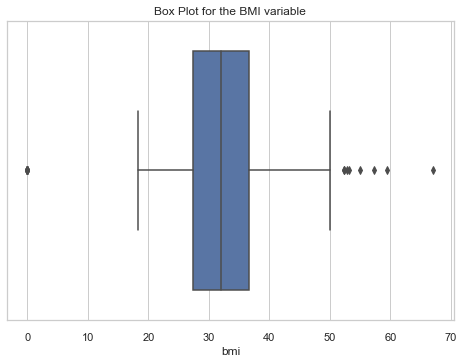

In [9]:
sns.set(style="whitegrid")
ax = sns.boxplot(x=df["bmi"])
plt.title('Box Plot for the BMI variable')

2. ¿Qué edad corresponde a la mediana?

Desde el EDA sabemos que la mediana para la variable edad es 29.  
Sin embargo, comprobemoslo con una sencilla línea de código:




In [10]:
df["age"].median()

29.0

3. Cuántos hijos tiene el 75% de las mujeres en el dataset?   

Para saber esto, necesitamos sacar el Q3 de la variable 'pregnancies'. Podemos de nueva cuenta hacer un boxplot para ayudarnos visualmente y luego obtenerlo con una línea de código. Esto nos indica que el 75% de las mujeres en nuestro dataset tienen entre 0 y 6 hijos.  


In [11]:
df['pregnancies'].quantile(.75)

6.0

Text(0.5, 1.0, 'Box Plot for the "pregnancies" variable')

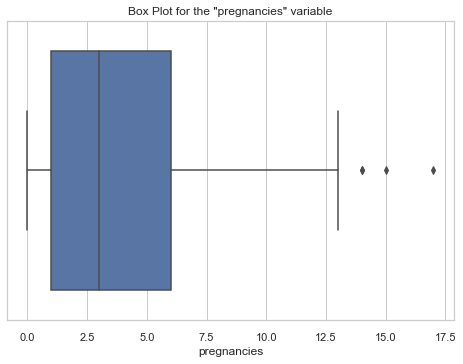

In [12]:
sns.set(style="whitegrid")
ax = sns.boxplot(x=df["pregnancies"])
plt.title('Box Plot for the "pregnancies" variable')

4. ¿Cuántas observaciones tienes de diabetes?
Podemos observar el EDA u obtener manualmente cuantos valores de 0 y 1 tenemos en la columna "outcome". Ya que si el valor es 1, la paciente tiene diabetes y 0 si no, tenemos que:   
    * De las 768 observaciones, 268 tienen diabetes.  

In [13]:
df["outcome"].value_counts()

0    500
1    268
Name: outcome, dtype: int64

5. ¿Cuál es la mediana de número de hijos para mujeres entre 25 años y 35 años de edad (inclusive)?   
La mediana de número de hijos para mujeres entre 25 y 35 años es 3.

In [14]:
#Creamos un df auxiliar dónde solo tenemos datos de las mujeres entre 25 y 35 años
aux=df[(df["age"]>=25) & (df["age"]<=35)]
#Obtenemos la mediana de embarazos del dataframe auxiliar
print("La mediana de número de hijos para mujeres entre 25 y 35 años es: "+str(aux["pregnancies"].median()))

La mediana de número de hijos para mujeres entre 25 y 35 años es: 3.0


### Gráficas

![title](Graphs/CorrelationMatrix.jpg)

La matriz de correlación nos muestra el coeficiente de correlación (r^2) entre las distintas variables de nuestro dataset. Me parece que la columna a la  que más atención se le debe prestar es a la de "outcome". Si vemos como se relaciona esta variable con las demás, tal vez nos puede dar una primera muy vaga intuición de que variables serán relevantes para nuestro árbol de decisión y cuales no. Notemos que la correlación más grande que existe de la variable outcome es con la variable glucosa. Lo cual tiene mucho sentido ya que los pacientes diabéticos suelen presentar altos niveles de glucosa en la sangre. Otras relaciones importantes a resaltar sería que edad y número de embarazos parecen estar altamente relacionados al igual que los niveles de insulina con el grosor de la piel. 

([<matplotlib.axis.XTick at 0x25318c4a080>,
 <a list of 9 Text major ticklabel objects>)

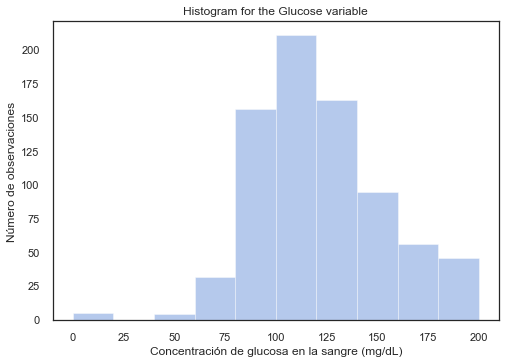

In [15]:
sns.set(color_codes=True)
sns.set(style="white", palette="muted")
sns.distplot(df["glucose"],kde=False,bins=[0,20,40,60,80,100,120,140,160,180,200])
plt.title('Histogram for the Glucose variable')
plt.xlabel("Concentración de glucosa en la sangre (mg/dL)")
plt.ylabel("Número de observaciones ")
plt.xticks(np.linspace(start=0, stop=200, num=9))

Al tener una correlación fuerte con la variable target (outcome), me parece importante tener un historgrama de la variable que refleja los niveles de glucosa en la sangre. Ya que esta puede ser un buen candidato a ser una variable con alto grado de importancia.   
Los valores de glucosa normales para un adulto saludable (asumiendo que las pruebas se hicieron en ayunas) son de entre 80 y 100. Por lo tanto, vemos que de nuestros datos, varias observaciones están en riesgo ya que más de 200 observaciones presentaron niveles de glucosa entre 100 y 120 mg/dL lo cual es superior a lo deseable. Consultando el EDA vemos que la media está alrededor de 120 mg/dL. Lo cual indica que no debería sorprender si tenemos un alto número de observaciones con diabetes. 

Text(0.5, 1.0, 'Box Plot for the "Age" variable')

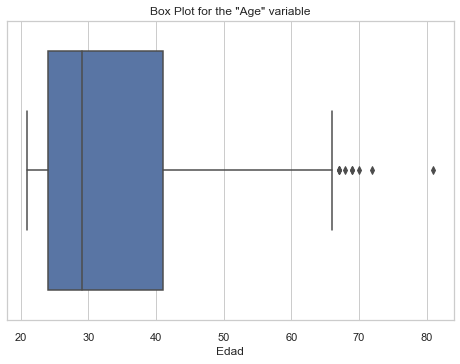

In [16]:
sns.set(style="whitegrid")
ax = sns.boxplot(x=df["age"])
plt.xlabel("Edad")
plt.title('Box Plot for the "Age" variable')

Nos parece importante tener una idea de la distribución de nuestros datos de edad. Como podemos ver, la mayoría de mujeres en nuestro dataset están entre los 22 y los 42 años aproximadamente. Son mujeres relativamente jóvenes. Si bien sí tenemos mujeres de edad avanzada, son realmente pocas.

![title](Graphs/freqtable.png)

El objetivo del proyecto es justamente predecir si una mujer tendrá diabetes basado en ciertas condiciones existentes. Por lo tanto, es necesario saber de antemano cuántas mujeres diabéticas y no diabéticas tenemos en nuestro dataset. Vemos que son mayoría las mujeres sin diabetes, lo cual sería de esperarse ya que como vimos en gráficas anteriores, las mujeres representadas en nuestro dataset son mujeres relativamente jóvenes. 

Text(0.5, 0, 'Índice de masa corporal (Kg/(m)^2)')

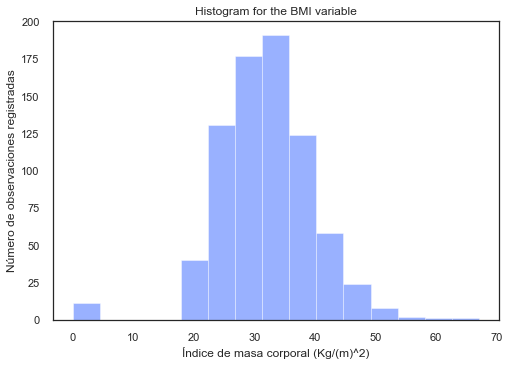

In [17]:
sns.set(color_codes=True)
sns.set(style="white", palette="bright")
sns.distplot(df["bmi"],kde=False,bins=15)
plt.title('Histogram for the BMI variable')
plt.ylabel("Número de observaciones registradas")
plt.xlabel("Índice de masa corporal (Kg/(m)^2)")

El Body Mass Index (BMI) es un indicador del peso ideal que debe tener una persona en comparación con su estatura. Se ha visto que el BMI tiene una fuerte relación con la presencia de enfermedades graves en los humanos. Un BMI saludable es entre 18.5 y 24.9. Al igual que con los niveles de glucosa, vemos que muchas de nuestras observaciones tienen un BMI por arriba de lo saludable. Esto indica que gran parte de nuestras observaciones serán personas con sobre peso y por lo tanto, serán población de riesgo para padecer diabetes. 

### Definición de etiquetas:

* TP: El modelo predijo que la mujer tenía diabetes y realidad sí tenía diabetes.
* FP: El modelo presdijo que la mujer sí tenía diabetes y en realidad no tenía diabetes. 
* TN: El modelo presdijo que la mujer no tenía diabetes y en realidad no tenía diabetes.
* FN: El modelo presdijo que la mujer no tenía diabetes y en realidad sí tenía diabetes.   
En este caso me parece que el error más costoso es el FN ya que si el modelo evalúa que la paciente no tiene diabetes y se confía en su outcome, la paciente no se medicará ni modificará su estilo de vida. Esto puede ser muy perjudicial ya que si un paciente diabético come y bebe como una persona sana, puede desembocar en consecuencias graves como pérdidas de extremidades o incluso la muerte. Sin mencionar el riesgo a la salud de vivir sin medicarse.

## Árboles (prueba)

### Data splitting

In [18]:
df.head()

pregnancies  glucose  bloodpressure  skinthickness  insulin   bmi  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   diabetespedigreefunction  age  outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1

In [19]:
X = df.filter(['pregnancies','glucose','bloodpressure','skinthickness','insulin','bmi','diabetespedigreefunction','age'], axis=1)
y=df.outcome
print(y.shape)
X.columns

(768,)


Index(['pregnancies', 'glucose', 'bloodpressure', 'skinthickness', 'insulin',
       'bmi', 'diabetespedigreefunction', 'age'],
      dtype='object')

In [20]:
from sklearn.model_selection import train_test_split

# train test split
#Utilizamos como random seed la clave única menor
X_train, X_test, y_train, y_test =  train_test_split(X, y, test_size=0.3, random_state=165815)
print("\nX_train, y_train: ", (X_train.shape, y_train.shape))
print("\nX_test, y_test: ", (X_test.shape, y_test.shape))


X_train, y_train:  ((537, 8), (537,))

X_test, y_test:  ((231, 8), (231,))


In [21]:
#Hagamos una función para obtener la importancia de variables:
def get_feature_importance(feature_importances, data):
    fi = pd.Series(feature_importances).sort_values(ascending=False)
    names = pd.Series(data.columns.values)
    
    df_1 = pd.DataFrame({'feature_importance': fi, 'column': fi.index})
    df_2 = pd.DataFrame({'feature': names, 'column': names.index})
    
    df = df_2.merge(df_1).sort_values(by="feature_importance", ascending=False)
    
    return df

## Arboles con CV y Modificando HP

Restricción de negocio: No puedes tener más de 3% de falsos positivos

In [22]:
from sklearn.model_selection import KFold
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import ParameterGrid, GridSearchCV
import matplotlib.pyplot as plt
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import plot_precision_recall_curve
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score, roc_curve, accuracy_score
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.tree import DecisionTreeClassifier, plot_tree

import matplotlib.pyplot as plt
import matplotlib.pyplot as plt

In [23]:

dt = DecisionTreeClassifier(random_state=165815)
grid = {'min_samples_leaf': [3,5,7,11,13,15,17,19],'min_samples_split':[4,6,8,12,15,20,23,25,27,30,33,35,37,39] ,'max_depth' : [3, 10, 20, 40],'criterion': ['gini', 'entropy']}
#Nota: se generan 8 modelos. 
gs = GridSearchCV(dt, param_grid=grid, scoring='f1', cv=10, n_jobs=-1,return_train_score=True)

gs.fit(X_train, y_train)

#Veamos cuál fue el mejor:
best=gs.best_estimator_
best

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=10, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=17, min_samples_split=37,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=165815, splitter='best')

In [24]:
get_feature_importance(best.feature_importances_, X)

feature  column  feature_importance
1                   glucose       1            0.576227
7                       age       7            0.144131
5                       bmi       5            0.129412
6  diabetespedigreefunction       6            0.089485
2             bloodpressure       2            0.041183
4                   insulin       4            0.014505
3             skinthickness       3            0.003254
0               pregnancies       0            0.001803

In [25]:
#Nos damos una idea de si sí funcionó
predicted_scores = best.predict_proba(X_test)
print(predicted_scores[:10,])
# obtiene las etiquetas del mejor predictor
predicted_labels = best.predict(X_test)
print(predicted_labels[:10])

[[0.85       0.15      ]
 [0.61290323 0.38709677]
 [0.4        0.6       ]
 [0.4        0.6       ]
 [0.83333333 0.16666667]
 [0.96296296 0.03703704]
 [0.85       0.15      ]
 [0.91666667 0.08333333]
 [0.86363636 0.13636364]
 [0.93333333 0.06666667]]
[0 0 1 1 0 0 0 0 0 0]


### Desempeño

#### ROC y AUC

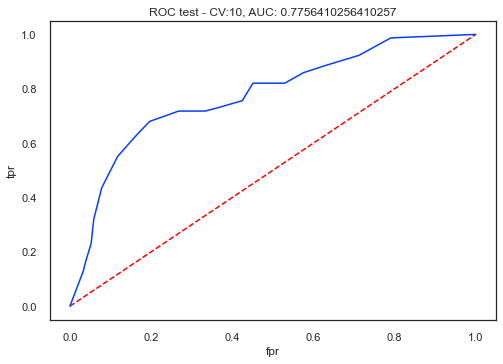

In [26]:
fpr, tpr, thresholds = roc_curve(y_test, predicted_scores[:,1], pos_label=1)
   
plt.clf()
plt.plot([0, 1], [0, 1], 'k--', c="red")
plt.plot(fpr, tpr)
plt.title("ROC test - CV:10, AUC: " + str(roc_auc_score(y_test, predicted_scores[:,1])))
plt.xlabel("fpr")
plt.ylabel("tpr")
plt.show()

#### Matriz de confusión

In [27]:
confusion_matrix(y_test, predicted_labels)

array([[128,  25],
       [ 29,  49]], dtype=int64)

#### Accuracy

In [28]:

def get_metrics_report(fpr, tpr, thresholds, precision, recall, thresholds_2):
    df_1 = pd.DataFrame({'threshold': thresholds_2,'precision': precision,
                    'recall': recall})
    df_1['f1_score'] = 2 * (df_1.precision * df_1.recall) / (df_1.precision + df_1.recall)
    
    df_2 = pd.DataFrame({'tpr': tpr, 'fpr': fpr, 'threshold': thresholds})
    df_2['tnr'] = 1 - df_2['fpr']
    df_2['fnr'] = 1 - df_2['tpr']
    
    df = df_1.merge(df_2, on="threshold")
    
    return df

In [29]:
print("Accuracy Score: "+str(accuracy_score(y_test, predicted_labels)))


precision, recall, thresholds_2 = precision_recall_curve(y_test, predicted_scores[:,1])
thresholds_2 = np.append(thresholds_2, 2.)
metrics_report = get_metrics_report(fpr, tpr, thresholds, precision, recall, thresholds_2)
metrics_report

Accuracy Score: 0.7662337662337663


threshold  precision    recall  f1_score       tpr       fpr       tnr  \
0    0.000000   0.337662  1.000000  0.504854  1.000000  1.000000  0.000000   
1    0.037037   0.388889  0.987179  0.557971  0.987179  0.790850  0.209150   
2    0.066667   0.397790  0.923077  0.555985  0.923077  0.712418  0.287582   
3    0.083333   0.418182  0.884615  0.567901  0.884615  0.627451  0.372549   
4    0.136364   0.432258  0.858974  0.575107  0.858974  0.575163  0.424837   
5    0.142857   0.441379  0.820513  0.573991  0.820513  0.529412  0.470588   
6    0.150000   0.481203  0.820513  0.606635  0.820513  0.450980  0.549020   
7    0.166667   0.475806  0.756410  0.584158  0.756410  0.424837  0.575163   
8    0.190476   0.504425  0.730769  0.596859  0.730769  0.366013  0.633987   
9    0.352941   0.523364  0.717949  0.605405  0.717949  0.333333  0.666667   
10   0.387097   0.577320  0.717949  0.640000  0.717949  0.267974  0.732026   
11   0.500000   0.638554  0.679487  0.658385  0.679487  0.196078  0.803922   
12   0.545455   0.662162  0.628205  0.644737  0.628205  0.163399  0.836601   
13   0.555556   0.704918  0.551282  0.618705  0.551282  0.117647  0.882353   
14   0.600000   0.714286  0.512821  0.597015  0.512821  0.104575  0.895425   
15   0.629630   0.739130  0.435897  0.548387  0.435897  0.078431  0.921569   
16   0.736842   0.735294  0.320513  0.446429  0.320513  0.058824  0.941176   
17   0.882353   0.692308  0.230769  0.346154  0.230769  0.052288  0.947712   
18   0.904762   0.684211  0.166667  0.268041  0.166667  0.039216  0.960784   
19   1.000000   0.666667  0.128205  0.215054  0.128205  0.032680  0.967320   
20   2.000000   1.000000  0.000000  0.000000  0.000000  0.000000  1.000000   

         fnr  
0   0.000000  
1   0.012821  
2   0.076923  
3   0.115385  
4   0.141026  
5   0.179487  
6   0.179487  
7   0.243590  
8   0.269231  
9   0.282051  
10  0.282051  
11  0.320513  
12  0.371795  
13  0.448718  
14  0.487179  
15  0.564103  
16  0.679487  
17  0.769231  
18  0.833333  
19  0.871795  
20  1.000000

   Vemos que el mejor modelo que se obtiene es con:
   * Max depth =10
   * Min_sample_leaves=17
   * min_sample_split=37
   

### Ahora eliminamos variables:
Ya que las variables "skinthickness" y "pregnancies" no aportan ni siquiera 1% a la ganancia de información, las quitaremos.


In [37]:
X = df.filter(['glucose','bloodpressure','bmi','diabetespedigreefunction','age'], axis=1)
y=df.outcome
print(y.shape)
X.columns

(768,)


Index(['glucose', 'bloodpressure', 'bmi', 'diabetespedigreefunction', 'age'], dtype='object')

In [38]:
X_train, X_test, y_train, y_test =  train_test_split(X, y, test_size=0.3, random_state=165815)
print("\nX_train, y_train: ", (X_train.shape, y_train.shape))
print("\nX_test, y_test: ", (X_test.shape, y_test.shape))


X_train, y_train:  ((537, 5), (537,))

X_test, y_test:  ((231, 5), (231,))


In [39]:
dt = DecisionTreeClassifier(random_state=165815)
grid = {'min_samples_leaf': [3,5,7,11,13,15,17,19],'min_samples_split':[4,6,8,12,15,20,23,25,27,30,33,35,37,39] ,'max_depth' : [3, 10, 20, 40],'criterion': ['gini', 'entropy']}
#Nota: se generan 8 modelos. 
gs = GridSearchCV(dt, param_grid=grid, scoring='f1', cv=10, n_jobs=-1,return_train_score=True)

gs.fit(X_train, y_train)

#Veamos cuál fue el mejor:
best2=gs.best_estimator_
best2

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=10, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=11, min_samples_split=25,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=165815, splitter='best')

In [40]:
get_feature_importance(best2.feature_importances_, X)

feature  column  feature_importance
0                   glucose       0            0.533488
4                       age       4            0.195858
2                       bmi       2            0.152369
3  diabetespedigreefunction       3            0.079943
1             bloodpressure       1            0.038343

In [41]:
#Nos damos una idea de si sí funcionó
predicted_scores2 = best2.predict_proba(X_test)
print(predicted_scores2[:10,])
# obtiene las etiquetas del mejor predictor
predicted_labels2 = best2.predict(X_test)
print(predicted_labels2[:10])

[[0.75       0.25      ]
 [0.42857143 0.57142857]
 [0.28571429 0.71428571]
 [0.28571429 0.71428571]
 [1.         0.        ]
 [0.78571429 0.21428571]
 [0.75       0.25      ]
 [0.93333333 0.06666667]
 [0.42857143 0.57142857]
 [0.90909091 0.09090909]]
[0 1 1 1 0 0 0 0 1 0]


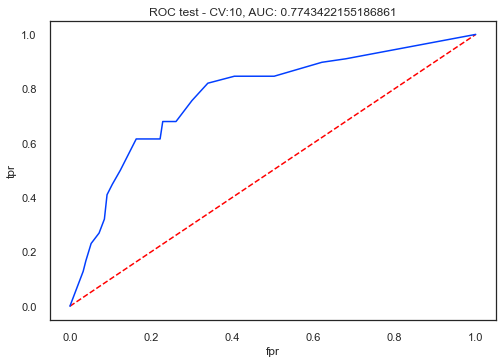

In [42]:
fpr, tpr, thresholds = roc_curve(y_test, predicted_scores2[:,1], pos_label=1)
   
plt.clf()
plt.plot([0, 1], [0, 1], 'k--', c="red")
plt.plot(fpr, tpr)
plt.title("ROC test - CV:10, AUC: " + str(roc_auc_score(y_test, predicted_scores2[:,1])))
plt.xlabel("fpr")
plt.ylabel("tpr")
plt.show()

In [43]:
print("Accuracy Score: "+str(accuracy_score(y_test, predicted_labels2)))


precision, recall, thresholds_2 = precision_recall_curve(y_test, predicted_scores[:,1])
thresholds_2 = np.append(thresholds_2, 2.)
metrics_report2 = get_metrics_report(fpr, tpr, thresholds, precision, recall, thresholds_2)
metrics_report2

Accuracy Score: 0.7619047619047619


threshold  precision    recall  f1_score       tpr       fpr       tnr  \
0   0.000000   0.337662  1.000000  0.504854  1.000000  1.000000  0.000000   
1   0.066667   0.397790  0.923077  0.555985  0.897436  0.620915  0.379085   
2   0.142857   0.441379  0.820513  0.573991  0.846154  0.483660  0.516340   
3   0.190476   0.504425  0.730769  0.596859  0.846154  0.405229  0.594771   
4   0.555556   0.704918  0.551282  0.618705  0.615385  0.163399  0.836601   
5   0.736842   0.735294  0.320513  0.446429  0.410256  0.091503  0.908497   
6   0.882353   0.692308  0.230769  0.346154  0.230769  0.052288  0.947712   
7   0.904762   0.684211  0.166667  0.268041  0.166667  0.039216  0.960784   
8   1.000000   0.666667  0.128205  0.215054  0.128205  0.032680  0.967320   
9   2.000000   1.000000  0.000000  0.000000  0.000000  0.000000  1.000000   

        fnr  
0  0.000000  
1  0.102564  
2  0.153846  
3  0.153846  
4  0.384615  
5  0.589744  
6  0.769231  
7  0.833333  
8  0.871795  
9  1.000000

# To do:
* Utiliza un k-fold cross validation de 10 - [x]
* Genera un GridSearch modificando al menos dos hiperparámetros del árbol con al menos 2 valores diferentes (cada hiperparámetro) - [x]
* Una vez que seleccionaste el mejor modelo, obtén la importancia de variables - [x]
* Selecciona las variables más importantes -> define a partir de qué porcentaje es para ti "más importante" (justifica) - [x]
* Genera un nuevo modelo con k-fold cross validation de 10 con las variables seleccionadas en el punto anterior - [x]
* Genera un nuevo GridSearch modificando al menos dos hiperparámetros del árbol con al menos 2 valores diferentes (cada hiperparámetro) - [x]
* Una vez que seleccionaste el mejor modelo, obtén la importancia de variables indicando su porcentaje - [x]
* Genera la tabla de métricas - [x]
* Selecciona el mejor punto de threshold de acuerdo a la métrica seleccionada y las restricciones de negocio
* Genera la matriz de confusión correspondiente a ese punto de corte
* Genera ROC y AUC